# EDA. Interactive visualizations

Я буду працювати з набором даних, що містить ціни на будинки в місті Еймс штату Айова. Дані взяті зі [змагання](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) на Kaggle.



 0. *Імпорт бібліотек.*


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import missingno as msno
%matplotlib inline



1. Завантажую `train.csv` у змінну `df_train`.

In [ ]:
df_train = pd.read_csv('train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


2. Виводжу інформацію про колонки у наборі даних.

In [ ]:
df_train.info()
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


3. Задача, яку я розглядаю – це задача регресії.  Цільова змінна у цьому випадку буде  `SalePrice`. Важливо зрозуміти, як вона розподілена та як взаємодіє з іншими змінними.
Найкраще моделюються змінні, близькі до нормального розподілу.

3.1. Побудую функцію щільності (розподіл даних) `SalePrice` за допомогою `seaborn`.

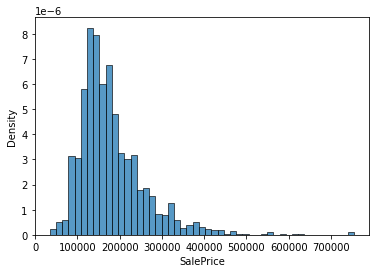

In [ ]:
sns.histplot(df_train.SalePrice, stat="density");


3.2. Виведу skewness та kurtosis для `SalePrice`.

In [ ]:
print("Skewness(SalePrice): %f" % df_train.SalePrice.skew())
print("Kurtosis(SalePrice): %f" % df_train.SalePrice.kurt())

Skewness(SalePrice): 1.882876
Kurtosis(SalePrice): 6.536282


4. Побудую матрицю кореляції, яка міститиме цільову змінну `SalePrice` і усі числові. Відображу її у вигляді теплової картки.


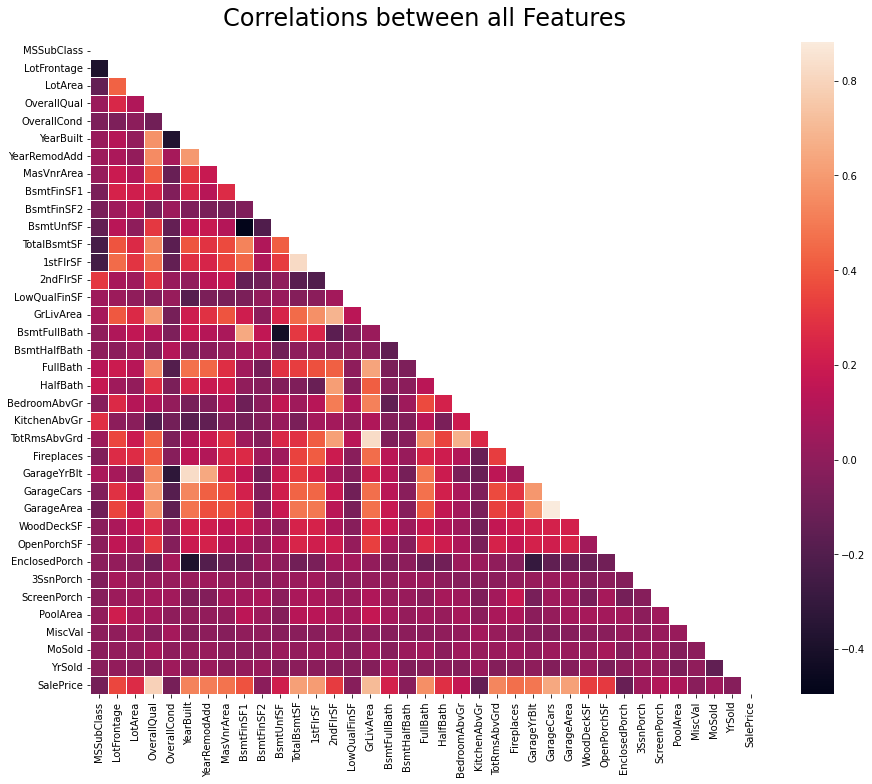

In [ ]:
corr_data = df_train.drop(['Id'],axis = 1)
corr_data = corr_data.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(15, 12))
matrix = np.triu(corr_data.corr())
heatmap = sns.heatmap(corr_data.corr(),linewidth=.8, mask=matrix, cmap="rocket")
heatmap.set_title('Correlations between all Features', fontdict={'fontsize':24}, pad=16);

*При побудові даної матриці кореляцій можна дізнатися про наявність лінійних залежностей між двома змінними для цілого набору даних. Візуально видно (найсвітліші комірки в рядку "SalePrace"), що потенційно сильно на цільову змінну впливають наступні ознаки: OverallQual,GrLivArea,GarageCars,TotalBsmtSF. Значення коефіцієнта кореляції для цих ознак найближче до 1, що говорить, що зі збільшенням значення відповідної ознаки збільшується значення цільової змінної. До змінних, які потенційно не впливають (забарвлення відповідає нульовій кореляції) на цільову змінну належать: LowQualFinSF, MiscVal,BsmtHalfBath, BsmtFinSF2. Це означає, що дані ознаки ніякого вкладу в передбачення цільової зміної не даватимуть.*

4.1. Виведу топ 10 змінних з якими `SalePrice` має найбільшу позитивну кореляцію.

In [ ]:
corr_process = corr_data.corr()[['SalePrice']]
res_df = corr_process.sort_values(by='SalePrice', ascending=False)[1:].head(10)
res_df



,SalePrice
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897
YearRemodAdd,0.507101


4.2. Побудую теплову карту кореляцій тільки серед змінних `SalePrice` та топ 10, що корелюють із нею.

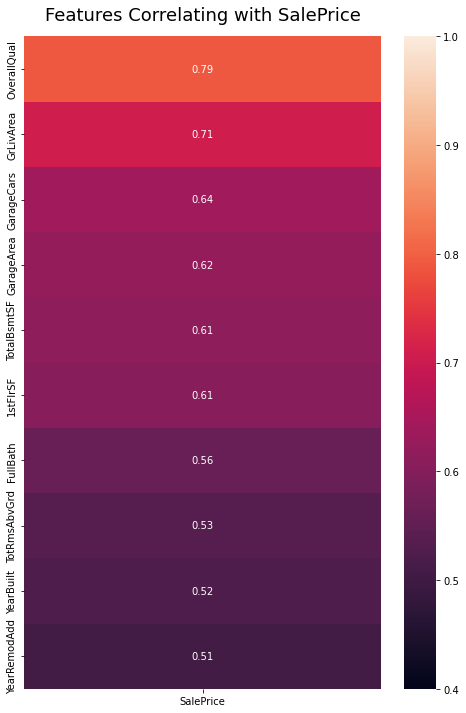

In [ ]:
plt.figure(figsize=(8, 12))
heatmap2 = sns.heatmap(res_df, vmin=0.4, vmax=1, annot=True, cmap="rocket")
heatmap2.set_title('Features Correlating with SalePrice', fontdict={'fontsize':18}, pad=16);

5. Побудую трикутний pairplot для `SalePrice` і топ 10 ознак у наборі даних, що корелюють з нею.
Додам лінії тренду до даних. По діагоналі виведу kernel density estimation (kde) змінних.

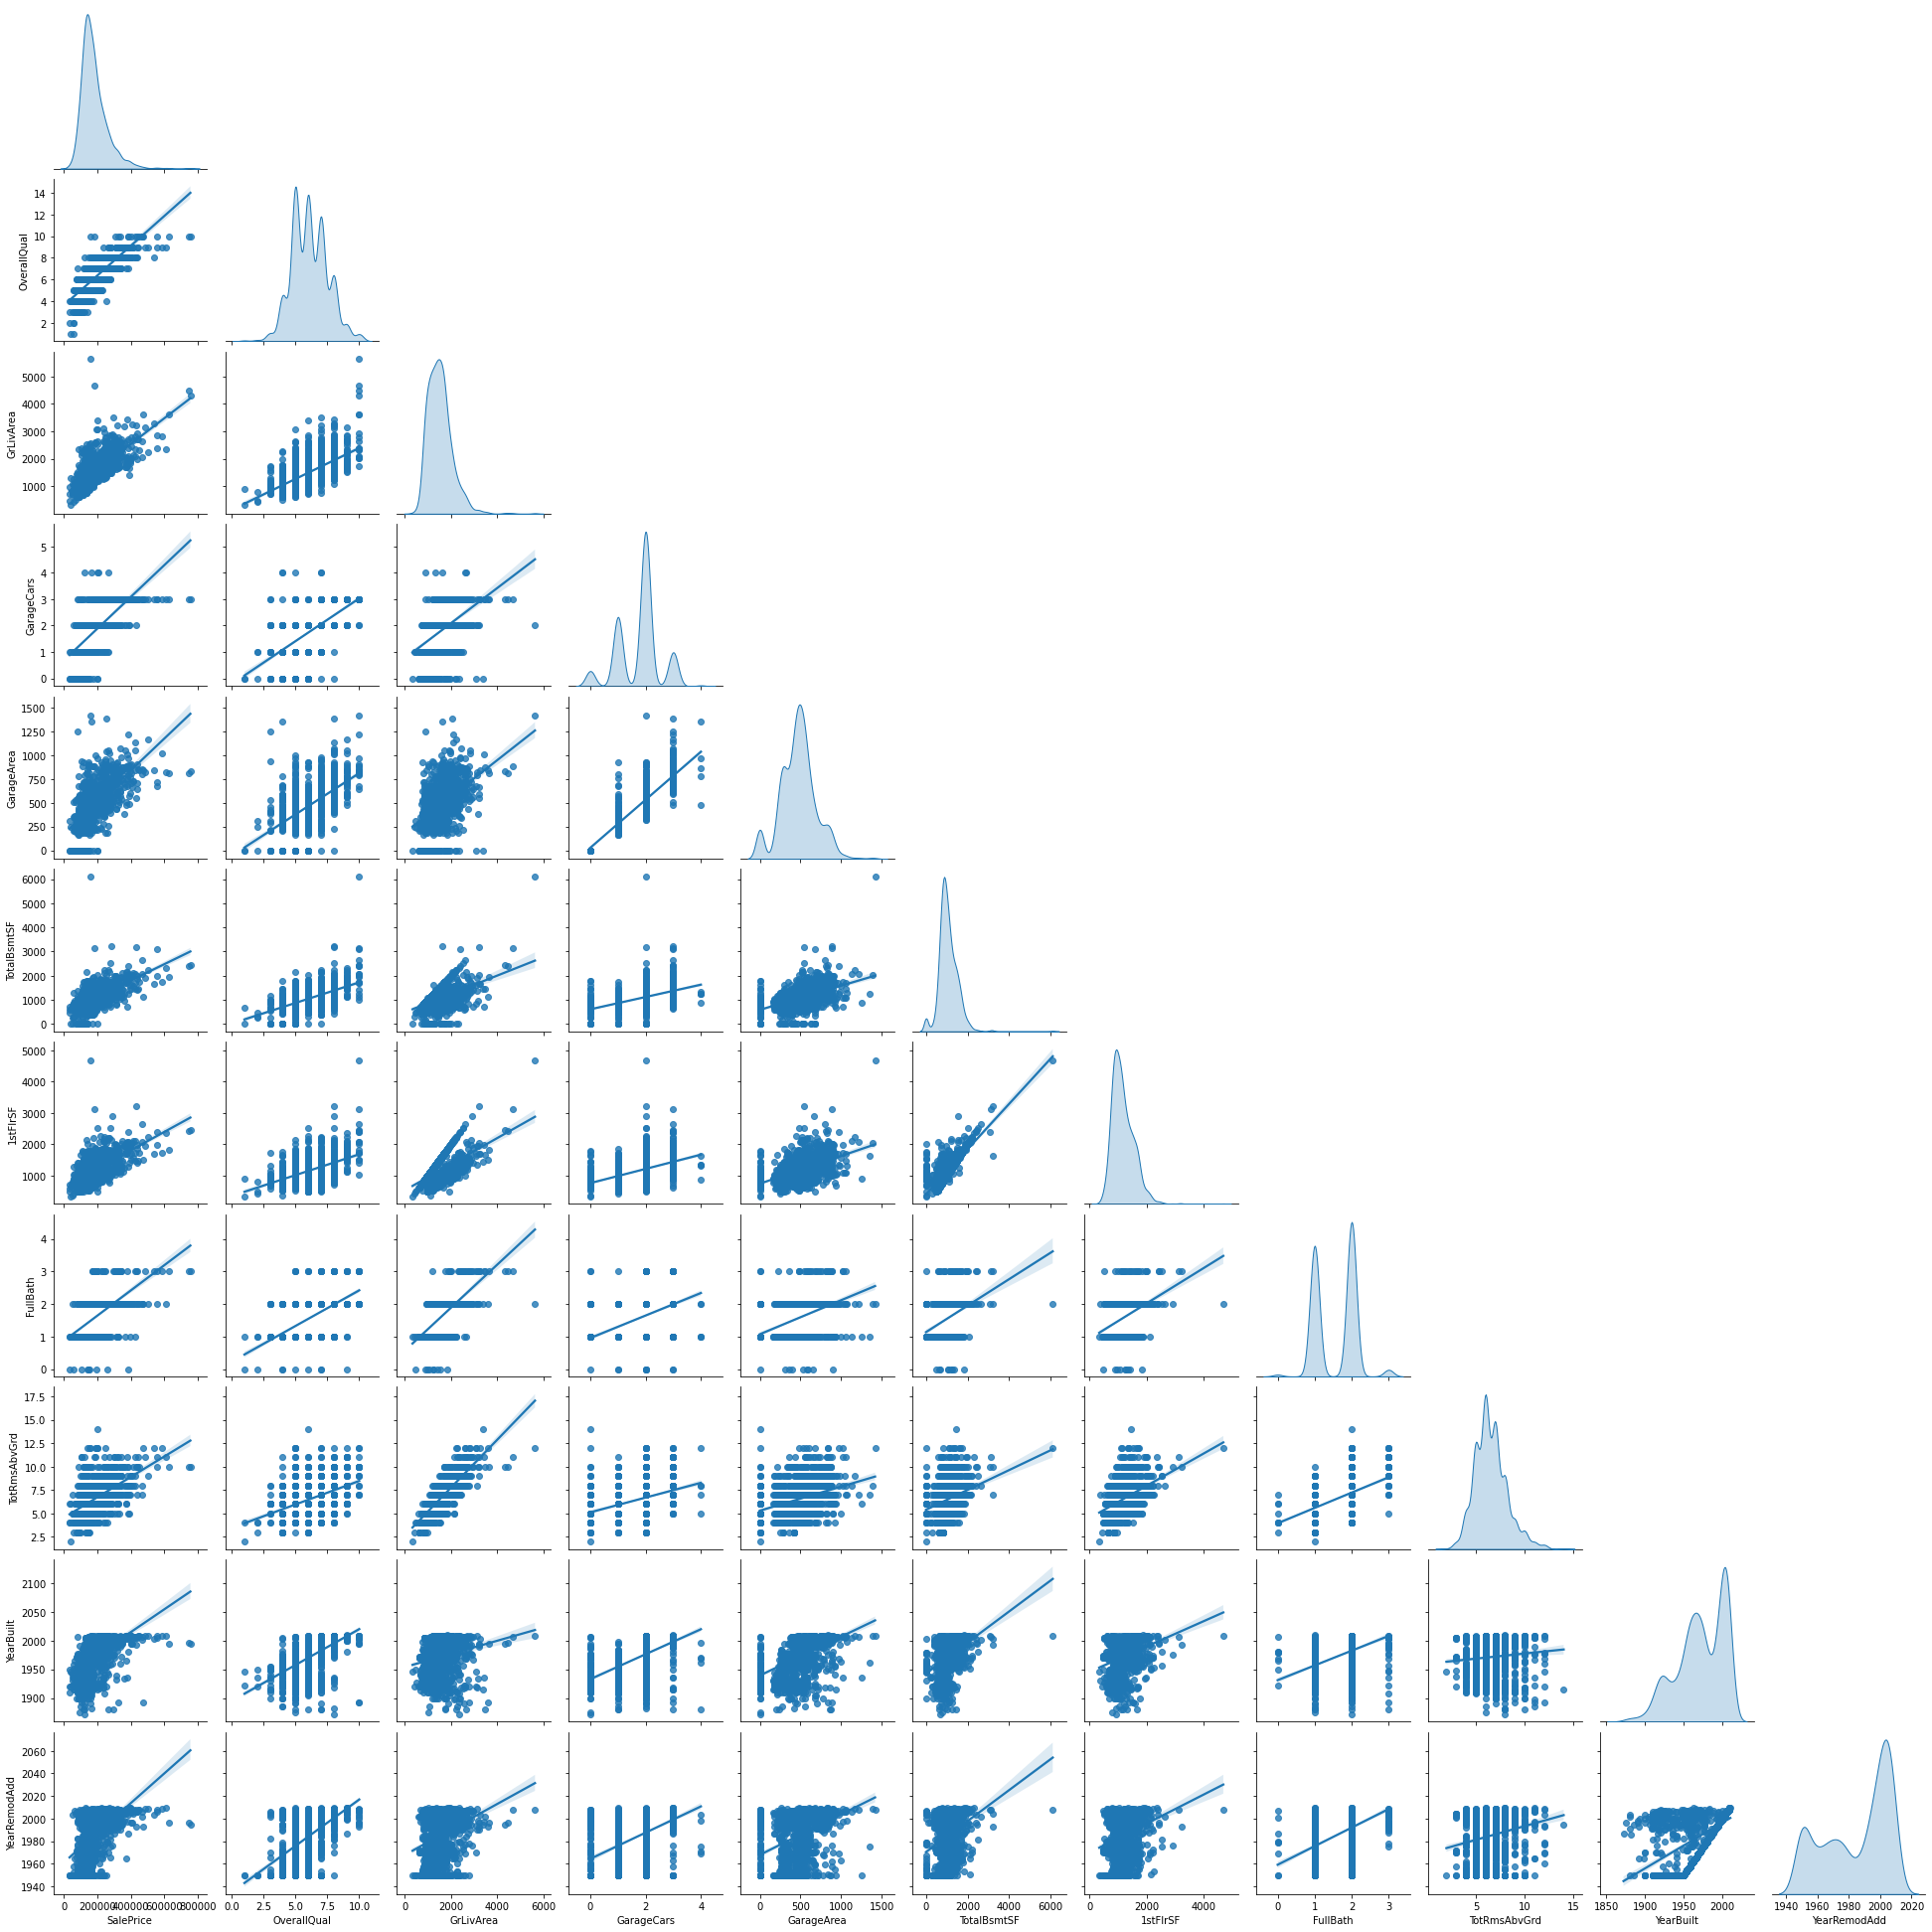

In [ ]:

data_for_pair_plot = df_train[corr_process.sort_values(by='SalePrice', ascending=False).head(11).index]
pair_plot1 = sns.pairplot(data_for_pair_plot, corner=True, kind="reg", diag_kind="kde")

Звідси можна побачити точки, які начебто не потрапили до загального кластеру. Це наші аутлаєри. Такими є, наприклад, точки з невисокою `SalePrice` і при цьому високе значення `GrLivArea`, або точка зі значенням `TotalBsmtSF` близько 6000 і при цьому низьким `SalePrice`. Розгляну детальніше, що це за точки.

5.1. Виведу значення з `GrLivArea` строго більше 4000.

In [ ]:
outliers_1 = df_train[df_train.GrLivArea>4000]
outliers_1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


5.2.Оскільки не всі колонки помістилися при виведенні, встановлю параметр `display.max_columns` рівний 100. І виведу ще раз попередні дані.

In [ ]:
pd.set_option('display.max_columns', 100)

num_columns1 = len(outliers_1.columns)
print("Number of columns:",num_columns1)

outliers_1

Number of columns: 81


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


5.3. Для даних отриманих у п.5.1 проаналізую чим відрізняються точки з обраних, у яких низька ціна (менше 200000) від тих, у яких ціна висока (більше 700000).

Для цього відкину малоінформативні колонки.



In [ ]:
number_distinct = outliers_1.nunique()
cols_to_drop = number_distinct[number_distinct == 1].index
outliers_after_drop = outliers_1.drop(cols_to_drop, axis=1).dropna(axis=1, how='all')

num_columns2 = len(outliers_after_drop.columns)
print("Number of columns:",num_columns2)

print(cols_to_drop)
outliers_after_drop

Number of columns: 46
Index(['MSSubClass', 'MSZoning', 'Street', 'Utilities', 'LandSlope',
       'BldgType', 'HouseStyle', 'OverallQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF',
       'HalfBath', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'Fence', 'MiscVal'],
      dtype='object')


,Id,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,BsmtExposure,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea,PoolQC,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,130.0,40094,IR1,Bnk,Inside,Edwards,PosN,PosN,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,Gd,2260,878,3138,3138,1538,4676,1,0,3,3,11,1,Gd,BuiltIn,2007.0,3,884,208,406,0,NaN,10,2007,New,Partial,184750
691,692,104.0,21535,IR1,Lvl,Corner,NoRidge,Norm,Norm,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,Gd,1455,989,2444,2444,1872,4316,0,1,3,4,10,2,Ex,Attchd,1994.0,3,832,382,50,0,NaN,1,2007,WD,Normal,755000
1182,1183,160.0,15623,IR1,Lvl,Corner,NoRidge,Norm,Norm,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,Av,2096,300,2396,2411,2065,4476,1,0,3,4,10,2,TA,Attchd,1996.0,3,813,171,78,555,Ex,7,2007,WD,Abnorml,745000
1298,1299,313.0,63887,IR3,Bnk,Corner,Edwards,Feedr,Norm,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,Gd,5644,466,6110,4692,950,5642,2,0,2,3,12,3,Gd,Attchd,2008.0,2,1418,214,292,480,Gd,1,2008,New,Partial,160000


 Для початку слід проаналізувати ті ознаки які найбільше впливають на цільове значення, тобто ті які є в списку top10 по значенню коефіцієнта кореляції. А саме:OverallQual, GrLivArea,	GarageCars,	GarageArea, TotalBsmtSF,	1stFlrSF,	FullBath,	TotRmsAbvGrd,	YearBuilt,	YearRemodAdd.

  OverallQual - всі значення одинакові, GrLivArea - для найнижчої ціни маємо найбільше значення(яке відрізнятиметься майже на 1000)і видно, що між іншими трьома значеннями є незначна закономірність чим більше значення GrLivArea тим менша Saleprice, і ця закономірність не узгодшується із значенням кореляції для даної ознаки. GarageCars- не показує явної закомірності,	GarageArea проявляє себе так як GrLivArea найменша відповідає найбільшому значенню яке значно відрізняється від інших (~ на 600). TotalBsmtSF - найменші значення для набільших значень SalePrice, крім цього найбільше від інших відрізняється має найменше значення SalePrice;	1stFlrSF- ця сама поведінка спостерігається (найбільші значення для найменших),	FullBath- 3 з 4 одинакові значення;	TotRmsAbvGrd - найменше значення SalePrice має найбільше значення цієї ознаки (як і поведінка GrLivArea,GarageArea, TotalBsmtSF,1stFlrSF).  	YearBuilt та	YearRemodAdd підтверджується поведінка. Звідси висновок, що у 7 з 10 ознаки спостерігається набагато більше значення ознаки для найменшого цільоваго значення, крім того найбільші цільові значення володіють найменшими значеннями ознак.
  
  Тепер переглянемо інші ознаки чи немає екстримальних значень, які пояснювали б поведінку аутлаєрів. Для ознаки  Neighborhood  бачимо, для найбільших значень характерне значення NoRidge, а для менших - Edwards.


Сформулюю гіпотези про відмінності з погляду ознак (які ознаки найбільше впливають на різницю в ціні?). Гіпотези відсортую за спаданням гіпотетичного впливу:
1. Значення аутлаєрів пов'язані з розташуванням в місці (Naighbourhood), можливо найдорожчі квартири розташовані в найкращому районі, а дешевші - в найгіршому. І розташування в гіршому районі значно занижує ціну.
2. На основі подібної повідінки 7 з 10 найважливіших ознак можна зробити висновок, що наявна синтаксична помилка пов'язана з опискою нулів (забагото нулів написали, або недописали потрібного нуля), а саме:
для id = 524 значення SalePrice не змінюємо, для id = 692 замість 755000 буде 75500,для id =1183 замість 745000 буде 74500, для id =1299 навпаки буде більше значення замість 160000 буде 1600000.
3. Значення аутлаєрів пов'язане з Condition1 для найменшого значення SalePrice Feedr, можливо воно впливає на зменшення ціни, потрібно перевірити це.
4. Значення аутлаєрів пов'язане LandContour для найбільших значень маємо LvL, а для найменших Bnk
5. Цікаво дослідити також і ознаку PoolArea, з одного боку найбільше значення PoolArea для найменшої SalePrice ( як і в першій гіпотезі), а з іншого досить велике значення PoolArea для id = 1183. Це викликає сумнів чи справді необхідно забирати нуль для id = 1183.

5.4. Побудую діаграму розсіювання, в якій по осі ОХ - `GrLivArea`, по осі ОУ - `SalePrice`.

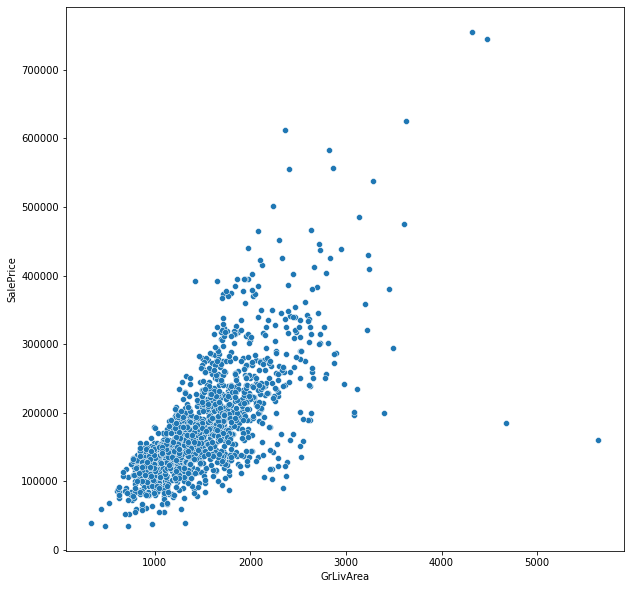

In [ ]:
plt.figure(figsize=(10, 10))
sc_plot1 = sns.scatterplot(data=df_train, x="GrLivArea", y="SalePrice");

Для дому з Id=1299 можна було б обґрунтувати низьку ціну тим, що вона має параметр Condition1=FeedR (точки з цим параметром зазвичай мають нижчу ціну), а ось з Id=524 Condition1 = PosN навряд чи негативно впливає на ціну, швидше навпаки. Схоже, причина низької ціни цих будинків - інша. 

5.5. Побудую діаграму розсіювання, в якій по осі ОХ - `GrLivArea`, по осі ОУ - `SalePrice`.

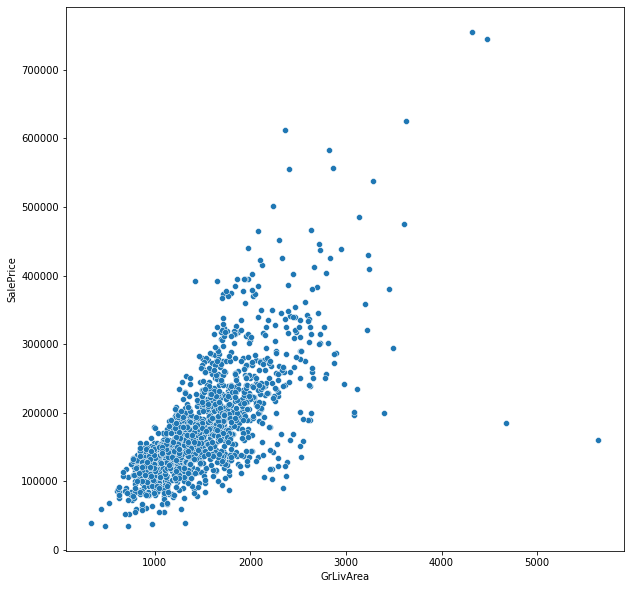

In [ ]:
plt.figure(figsize=(10, 10))
sc_plot1 = sns.scatterplot(data=df_train, x="GrLivArea", y="SalePrice");

Перевірю чи немає закономірності між поведінкою  `SalePrice` та різним Neighborhood.
Виведу mean, std, min, max, mode значення `SalePrice` для різних значень Neighborhood.

In [ ]:
#df_train.groupby('Neighborhood').SalePrice.agg(['mean', 'std','min', 'max', lambda x: scipy.stats.mode(x)[0]])
table1=df_train.groupby('Neighborhood').SalePrice.describe().sort_values(by='mean',ascending=False)
table1 = table1.style.background_gradient(axis=0, gmap=table1['mean'], cmap='YlOrRd')
table1


,count,mean,std,min,25%,50%,75%,max
Neighborhood,,,,,,,,
NoRidge,41.000000,335295.317073,121412.658640,190000.000000,265000.000000,301500.000000,341000.000000,755000.000000
NridgHt,77.000000,316270.623377,96392.544954,154000.000000,253293.000000,315000.000000,374000.000000,611657.000000
StoneBr,25.000000,310499.000000,112969.676640,170000.000000,213500.000000,278000.000000,377426.000000,556581.000000
Timber,38.000000,242247.447368,64845.651549,137500.000000,186900.000000,228475.000000,286115.750000,378500.000000
Veenker,11.000000,238772.727273,72369.317959,162500.000000,184250.000000,218000.000000,282000.000000,385000.000000
Somerst,86.000000,225379.837209,56177.555888,144152.000000,177975.000000,225500.000000,252919.500000,423000.000000
ClearCr,28.000000,212565.428571,50231.538993,130000.000000,183750.000000,200250.000000,242225.000000,328000.000000
Crawfor,51.000000,210624.725490,68866.395472,90350.000000,159250.000000,200624.000000,239000.000000,392500.000000
CollgCr,150.000000,197965.773333,51403.666438,110000.000000,152958.750000,197200.000000,225725.000000,424870.000000


6. Схоже будинки  Id=524 та Id=1299 мають *Neighborhood*, у якому ціни будинків низькі. Цим, можливо, й обґрунтовується ціна. Але це лише гіпотеза.

6.1. За допомогою бібліотеки `missingno` виведу у вигляді bar chart кількість відсутніх значень у колонках датасету. Щоб переглядати було комфортно, виведу на одній фігурі дві панелі розташовані вертикально (тобто друга під першою), де на першій панелі буде інформація про відсутні значення у перших 40 колонках, а на другій - у всіх інших.

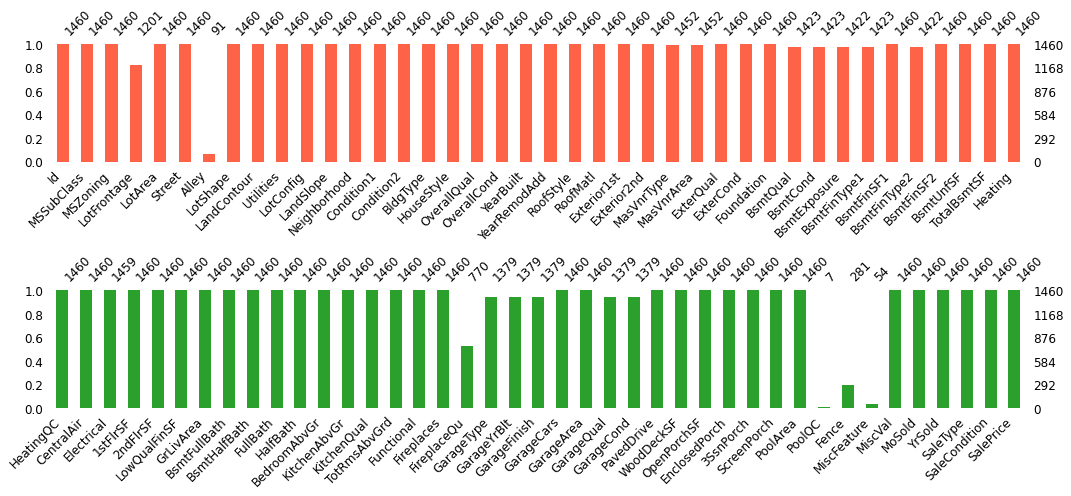

In [ ]:
fig= plt.figure(figsize=(15,7))

ax1 = fig.add_subplot(2,1,1)
msno.bar(df_train.iloc[:, :40], color='tomato',fontsize=12, ax=ax1)

ax2 = fig.add_subplot(2,1,2)
msno.bar(df_train.iloc[:, 40:],color="tab:green", fontsize=12, ax=ax2);

plt.tight_layout()

6.2 Використовуючи візуалізацію, визначу в яких колонках немає більше половини записів. 


Більше половини записів немає в наступних колонках: PoolQC, MiscFeature, Alley, Fence

6.2.1. Проведу подібний аналіз не візуально, а аналітично.
Порахую, скільки значень відсутні в кожній колонці датафрейму `df_train`.


In [ ]:
count_na = df_train.isna().sum().sort_values(ascending=False)
count_na

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

6.2.2. Користуючись змінною `count_na`, виведу колонки, у яких відсоток відсутніх значень строго більше 50. 

In [ ]:
n = df_train.Id.count()
count_na_perc = count_na/n*100
count_na_perc[count_na_perc>50]


PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
dtype: float64

6.3. Виведу матричне відображення відсутніх значень за допомогою бібліотеки missingno.

<Axes: >

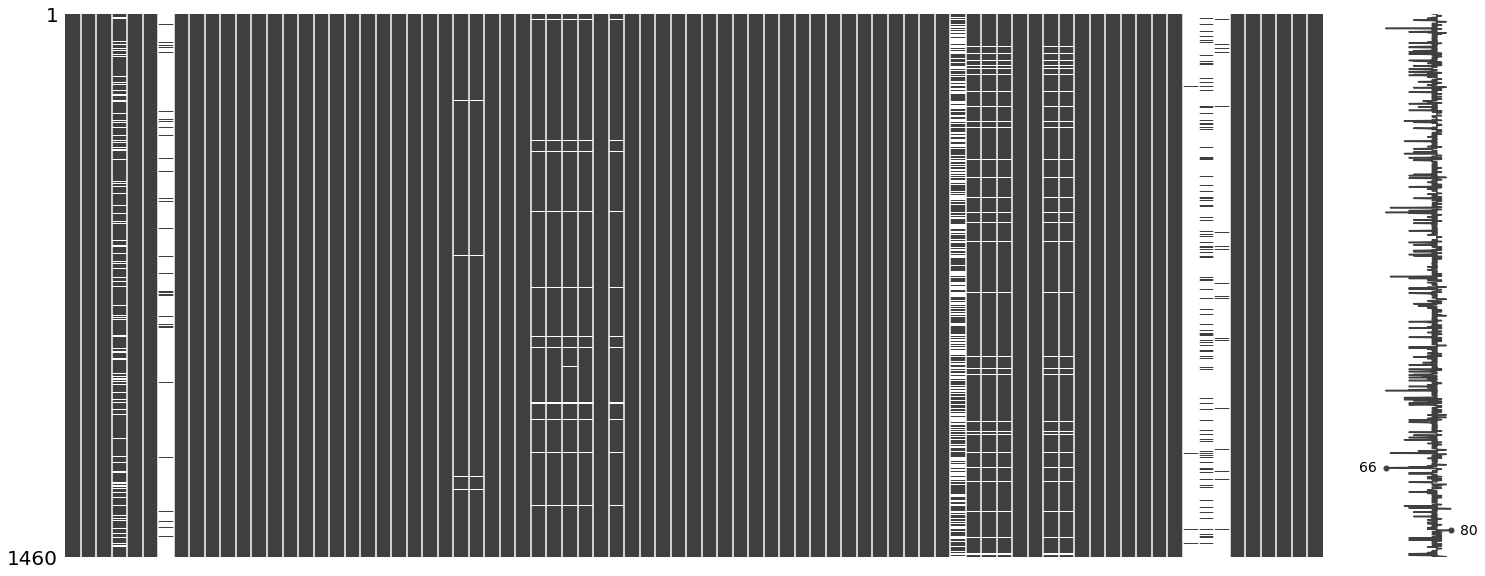

In [ ]:
msno.matrix(df_train)

Зі спарклайна справа можна побачити, що максимальна кількість заповнених даних
 в одному рядку 80, а  мінімальна - 66.

6.4. Виведу теплову картку відсутніх значень за допомогою бібліотеки `missingno`.  


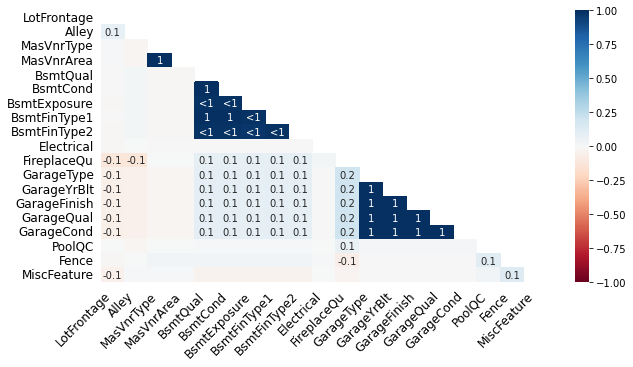

In [ ]:
msno.heatmap(df_train, figsize=(10,5), fontsize=12);


Позитивне значення кореляції з даної теплової карти, говорить, що якщо відсутнє
 значення однієї змінної, то значення іншої обов’язково відсутнє і навпаки. Тому для прикладу,якщо значення  GarageType відсутнє,  то велика імовірність, що значення FereplaceQu (0.2) також буде відсутнє. Крім того можуть бути відсутні значення BsmtFinType2, BsmtFinType1, BsmtExposure, BsmtCond, BsmtQual для яких значення кореляції рівне 0.1.